In [1]:
import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt

import mediapipe as mp
mp_objectron = mp.solutions.objectron
mp_drawing = mp.solutions.drawing_utils

Mediapipe Objectron provides pre-trained 3-D object detection models for shoe, chair, cup and camera.

Here we try performing object detection on a variety of images to determine in which scenarios the detector performs well. We also test detection on a video.

In [2]:
vidcap = cv2.VideoCapture('feet pics and videos/soccer sample 1.mp4')
shoe_images = {}
while True:    
    success, image = vidcap.read()
    if not success:
        break
    shoe_images[len(shoe_images)] = image

feet pics/with shoes on/mid distance.jpg


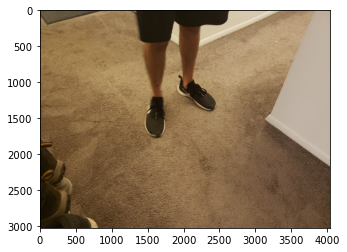

feet pics/with shoes on/easy.jpg


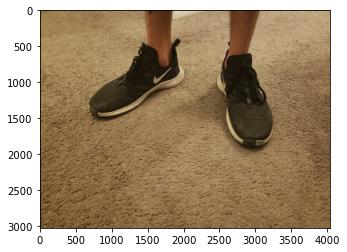

feet pics/with shoes on/mid distance 2 pairs.jpg


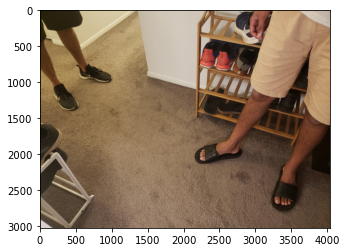

feet pics/with shoes on/easy slides.jpg


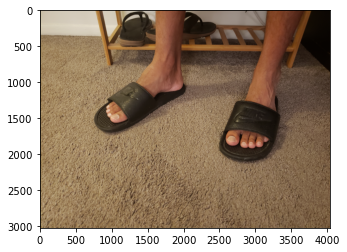

In [13]:
# Read images with OpenCV.
shoe_images = {name: cv2.imread(name) for name in glob.glob('feet pics and videos/with shoes on.mp4')}

# Preview the images.
for name, image in shoe_images.items():
    print(name)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

Run objectron on each image/frame of the video and output annotated versions

In [3]:
annotated_images = {}
annotated_res = {}

with mp_objectron.Objectron(
static_image_mode=True,
max_num_objects=5,
min_detection_confidence=0.5,
model_name='Shoe') as objectron:

    # Run inference on shoe images.
    for name, image in shoe_images.items():
        # Convert the BGR image to RGB and process it with MediaPipe Objectron.
        results = objectron.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        annotated_res[name] = results

        # Draw box landmarks.
        if not results.detected_objects:
            # print(f'No box landmarks detected on {name}')
            continue
        #print(f'Box landmarks of {name}:')
        annotated_image = image.copy()
        for detected_object in results.detected_objects:
            mp_drawing.draw_landmarks(
              annotated_image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
            mp_drawing.draw_axis(annotated_image, detected_object.rotation, detected_object.translation)
        
        annotated_images[name] = annotated_image
        #plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        #plt.show()

Save annotated video frames to disk as a new video

In [39]:
height, width, layers = annotated_images[0].shape
size = (width, height)

out = cv2.VideoWriter('feet pics and videos/annotated_video.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

for name, image in annotated_images.items():
    out.write(image)
out.release()